# Honey Production

In 2006, global concern was raised over the rapid decline in the honeybee population. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The dataset from Kaggle (https://www.kaggle.com/datasets/jessicali9530/honey-production) provides insight into honey production supply and demand in America by state from 1998 to 2012. Honey production data was published by the National Agricultural Statistics Service (NASS) of the U.S. Department of Agriculture.

The goal of this project is predicting honey production during upcoming years (till 2050) using Simple Linear Regression Model and some visualizations. 

Useful metadata on certain variables of the honeyproduction dataset is provided below:

- `numcol:` Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year.
- `yieldpercol:` Honey yield per colony. Unit is pounds.
- `totalprod:` Total production (`numcol` * `yieldpercol`). Unit is pounds.
- `stocks:` Refers to stocks held by producers. Unit is pounds.
- `priceperlb:` Refers to average price per pound based on expanded sales. Unit is dollars.
- `prodvalue:` Value of production (totalprod x priceperlb). Unit is dollars.
- `Other useful information:` Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, **summation of states will not equal U.S. level value of production**. Considering the last statement our final estimation won't be very accurate, but hopefully will show us general trend. 

## Data Investigation
Let's start by loading and inspecting the dataset.

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np
# Imports for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Imports for ml
from sklearn.linear_model import LinearRegression

honey_df = pd.read_csv('honeyproduction.csv')
honey_df.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


Let's check data types to understand whether they are truly numerical as they seem to be.

In [2]:
honey_df.dtypes

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

Let's check wheather or not there are some empty values (`nan`s) in the dataset.  

In [3]:
honey_df.isnull().values.any()

False

Now we are going to get some general statistics to understand whether data is OK in general. 

In [4]:
honey_df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


Now we'll check unique values of several columns to see if previous checks are valid. 

In [5]:
honey_df.yieldpercol.unique()

array([ 71,  60,  65,  83,  72,  98,  56, 118,  50,  92,  78,  46, 111,
        26,  44,  85,  79,  86,  66, 122,  70,  49,  55,  80,  59, 128,
        51,  45,  95,  64,  77,  58,  37,  91,  68,  62,  89,  76, 102,
        48,  81,  67, 114,  22,  82,  73,  52, 105,  74,  57, 104,  35,
        39,  75,  93, 112,  47,  61,  94,  21,  90,  88,  87, 115, 121,
        41,  42,  54, 100, 106,  20,  34,  96,  40,  38,  63, 136, 124,
        53,  33,  69,  19,  31,  27, 131,  97,  32,  84,  23,  36,  28,
        43,  29, 103,  30], dtype=int64)

In [6]:
honey_df.priceperlb.unique()

array([0.72, 0.64, 0.59, 0.62, 0.7 , 0.69, 0.77, 0.65, 1.19, 0.85, 0.87,
       1.4 , 1.1 , 0.66, 0.58, 0.76, 0.86, 1.65, 1.38, 0.63, 0.83, 1.24,
       0.9 , 0.8 , 1.32, 1.33, 1.14, 0.68, 0.56, 0.53, 0.55, 1.15, 1.11,
       0.49, 1.64, 0.61, 0.54, 0.6 , 1.54, 0.57, 1.62, 1.34, 1.3 , 1.17,
       1.09, 0.73, 0.82, 0.52, 1.03, 0.91, 1.35, 0.75, 1.45, 1.43, 0.79,
       1.26, 1.5 , 1.22, 0.71, 0.67, 1.58, 0.92, 0.96, 1.41, 1.6 , 0.81,
       0.89, 2.14, 1.48, 1.01, 0.74, 1.39, 1.42, 1.18, 1.08, 1.29, 1.13,
       1.37, 1.47, 1.63, 1.16, 1.21, 1.96, 1.23, 1.49, 2.67, 1.  , 1.25,
       1.46, 1.44, 1.2 , 1.9 , 1.27, 1.28, 1.83, 1.66, 1.67, 1.93, 2.04,
       1.36, 1.92, 1.84, 1.89, 1.52, 1.68, 1.05, 1.02, 1.59, 1.86, 1.06,
       1.78, 1.53, 1.73, 0.97, 1.51, 2.1 , 0.98, 1.04, 2.08, 0.94, 3.11,
       1.88, 1.12, 0.95, 2.2 , 2.19, 0.93, 3.62, 1.57, 2.02, 0.99, 1.7 ,
       2.49, 1.31, 2.12, 2.99, 1.77, 1.99, 2.43, 2.09, 2.59, 1.55, 2.44,
       2.18, 2.42, 2.16, 1.76, 2.55, 1.85, 2.71, 1.

Result: on the surface data looks fine for our purpose, so let's proceed to the analysis. 

## Feature Selection 

For now, we care about the total production of honey per year.

In [7]:
prod_per_year = honey_df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


Now let's check correlation between years and mean total production to see how big is correlation if it is there. 

In [8]:
prod_per_year.corr()

,year,totalprod
year,1.000000,-0.764559
totalprod,-0.764559,1.000000


Result: There is a pretty big negative correlation between these variables.

For further work we are going to need these values as variables `X` and `y` for model training. So we will start by creating a variable called `X` that is the column of years in `prod_per_year`. After creating `X`, we will need to reshape it to get it into the right format for model. The same we are going to do for the second column `totalprod`, that is going to become `y` variable, there is no need to reshape it though. 


In [9]:
# Get X values
X = prod_per_year.year
# Reshape years to list of lists
X = X.values.reshape(-1, 1)
# Get y values
y = prod_per_year.totalprod

Let's visualize changes in quantity of mean honey production from 1998 to 2012 that we got from our dataset. 

Text(0.5, 1.0, 'Mean honey production per year')

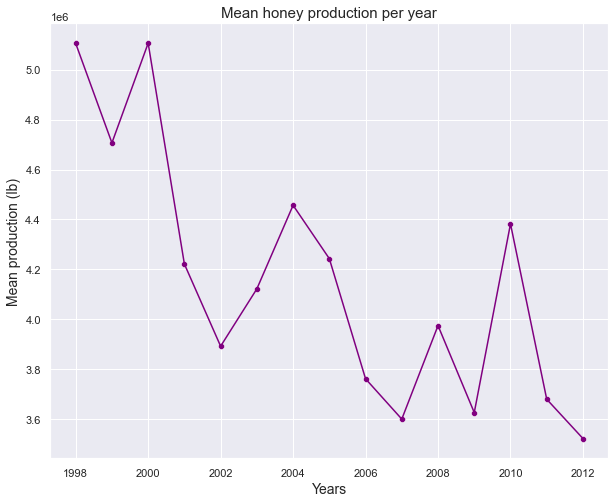

In [10]:
# Prepare figure
plt.figure(figsize = (10,8))
sns.set(style='darkgrid')

# Draw plot
ax1=sns.scatterplot(x=X[:,0], y=y, color='purple')
ax2=sns.lineplot(x=X[:,0], y=y, color='purple')

# Add descriptions
plt.xlabel('Years', fontsize=14)
plt.ylabel('Mean production (lb)', fontsize=14)
plt.title('Mean honey production per year', fontsize=15)

## Model Creation

Let's instantiate a linear regression model from scikit-learn and call it `regr`.

In [11]:
regr = LinearRegression()

Now we are going to train this model. The amount of data is small so no splitting required.

In [12]:
regr.fit(X, y)

LinearRegression()

Let's see values for slope inclination and intersept when we are getting minimal mean squared error. 

In [13]:
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238192
181208083.10732976


## Linear Regression Visualization

Now let's draw our linear regression line on top of our line of real changes.

In [14]:
# Get y values based on X for regression line
y_predict = regr.predict(X)

Text(0.5, 1.0, 'Mean honey production per year')

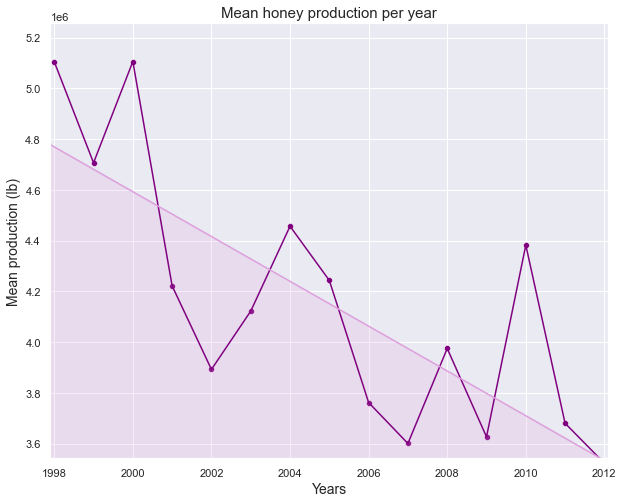

In [19]:
# Prepare figure
plt.figure(figsize = (10,8))
# Draw plot
ax0=sns.scatterplot(x=X[:,0], y=y, color='purple')
ax1=sns.lineplot(x=X[:,0], y=y, color='purple')
ax2=sns.lineplot(x=X[:,0]-0.1, y=y_predict, color='plum')

plt.fill_between(X[:,0]-0.1, y_predict, 3542064,
                 facecolor="plum", # The fill color
                 color='plum',     # The outline color
                 alpha=0.2) 

ax2.set_xlim([min(X[:,0])-0.1, max(X[:,0])+0.1])
ax2.set_ylim([3542064, max(y_predict)*1.1])             

# Add descriptions
plt.xlabel('Years', fontsize=14)
plt.ylabel('Mean production (lb)', fontsize=14)
plt.title('Mean honey production per year', fontsize=15)

## Tendency Prediction

Now, based on our current data we are going to use our trained model to predict mean honey production per year till year 2050 and visualize the result. 

In [16]:
# Create X values data 
X_future = np.array(range(2013, 2051))
# Reshape X values to list of lists
X_future = X_future.reshape(-1, 1)

# Predict y values based on new X
y_future_predict = regr.predict(X_future)

Text(0.5, 1.0, 'Mean honey production per year')

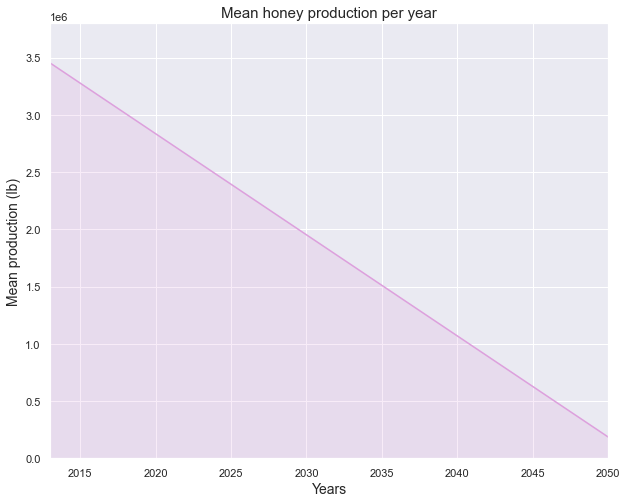

In [18]:
# Prepare figure
plt.figure(figsize = (10,8))
# Draw plot
axes = sns.lineplot(x = X_future[:,0], y = y_future_predict, color='plum')
plt.fill_between(X_future[:,0], y_future_predict, 0,
                 facecolor="plum", # The fill color
                 color='plum',     # The outline color
                 alpha=0.2) 

axes.set_xlim([min(X_future[:,0]), max(X_future[:,0])])
axes.set_ylim([0, max(y_future_predict)*1.1])               

# Add descriptions
plt.xlabel('Years', fontsize=14)
plt.ylabel('Mean production (lb)', fontsize=14)
plt.title('Mean honey production per year', fontsize=15)

In [44]:
short_ton = (regr.predict([[2050]]) / 2000.001).round()
short_ton[0]

93.0

In [52]:
metric_ton = (short_ton*1.102311).round()
metric_ton[0]

103.0

### Conclusion

We have visualized mean values of honey production per year based on the current dataset and after that used this data to predict honey production in the upcoming years. Based on our very limited amount of mean values we got ourselves very steep slope of negative linear relationship that tells us that honey production in the U.S. will drop to about 93 short tons or 103 metric tons in 2050.